In [1]:
from NeuronModel import *
from Storage import *
from Visualization import *
import scipy.fftpack
%config InlineBackend.figure_formats=['svg']

# Read Data

In [2]:
def ReadData(datafolder, FigNum):
    storage = Storage.FromFile(datafolder+"/Parameters.json")
    storage.ReadData()
    brain = NeuronModel(N=storage._NumberOfNeurons, connectionscale=storage._ConnectionScale, synapselimit=storage._SynapseLimit, synapsestrengthlimit=storage._SynapseLimit, **storage._Parameters)
    storage._Brain = brain
    brain._Time = np.array(storage._time)
    brain._VV = np.array(storage._FullData)
    storage._NumberOfNeurons = np.shape(brain._VV)[1]
    brain._NumberOfNeurons = np.shape(brain._VV)[1]
    storage.ReadNetworkData(datafolder+"/Network.json")
    return brain

In [3]:
brain=ReadData("/Users/sahand/Research/NeuroNet/Data/BW2/ ",1)
vis=Visualization(brain,1)

# Plot State

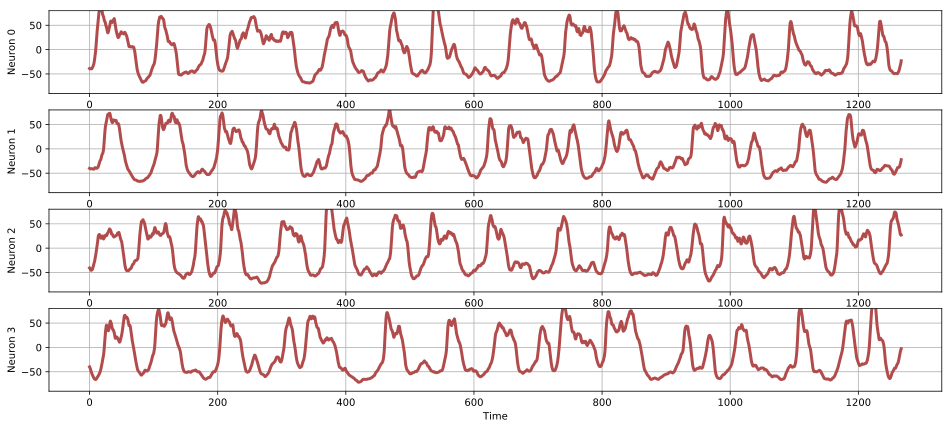

In [4]:
neurons = [0,1,2,3]
vis.PlotState(neurons,figsize=(16, len(neurons)+3))

# FFT

In [93]:
def PlotFFT(n):
    N = len(brain._Time)
    T = brain._dt/1000
    xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
    
    #y = np.sin(brain._Time)
    yf = scipy.fftpack.fft(brain._VV[:,n])
    #yf = scipy.fftpack.fft(y)
    
    yplot = 2.0/N * np.abs(yf[:N//2])
    n = 150
    p = plt.stem(xf[:n], yplot[:n])
    #p = plt.plot(brain._Time[:n], y[:n])
    plt.setp(p,'color',[0.7,0.3,0.3])
    plt.grid(True)
    plt.xlabel('Frequency in Hz')


/Users/sahand/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


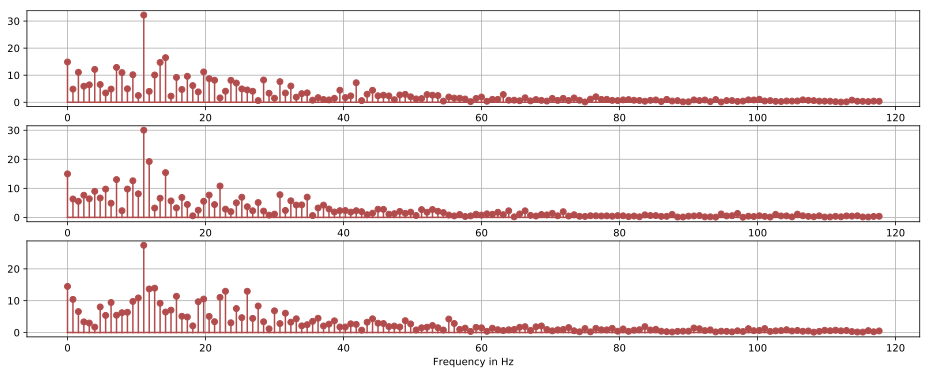

In [95]:
plt.figure(1)

neurons = [0,1,2]
plt.rcParams["figure.figsize"] = (16, len(neurons)+5)
for i,n in enumerate(neurons):
    plt.subplot(len(neurons),1,i+1)
    PlotFFT(n)
plt.show()

# Cross-Correlation

In [128]:
def getXCorr(l1,l2):
    corr = np.zeros_like(brain._Time)
    for n1 in l1:
        for n2 in l2:
            c = np.correlate(brain._VV[:,n1],brain._VV[:,n2],'full')
            corr += c[int(len(c)/2):]
        corr = corr/len(l2)
    return corr/len(l1)    

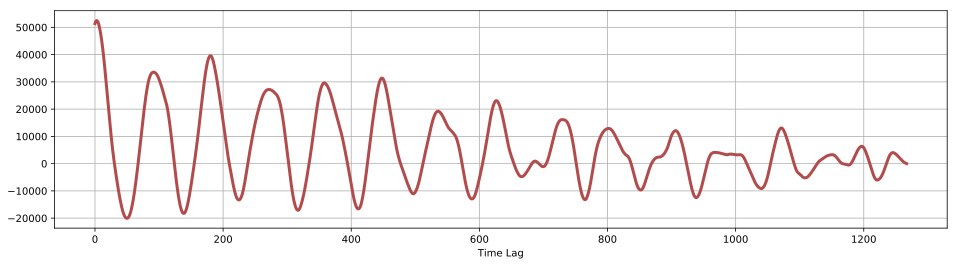

In [132]:
plt.rcParams["figure.figsize"] = (16, 4)
corr = getXCorr(range(100),range(100))
p = plt.plot(brain._Time,corr)
plt.xlabel("Time Lag")
plt.setp(p,'color',[0.7,0.3,0.3],'linewidth',3)
plt.grid(True)
plt.show()